# Kernels

See:
* Rasmussen + Williams, chapter 4

## Imports etc

In [14]:
import numpy as np
import GPy
import matplotlib.pyplot as plt

In [2]:
%run ~/.jupyter/config.ipy

# PreReqs

### Gram Matrix

[See wikipedia](https://en.wikipedia.org/wiki/Gramian_matrix). The Gram matrix of a set of vectors $x_1, ..., x_n$ is the matrix made up of their inner products, $G_{ij} = x_i \cdot x_j$.

As $x_i \cdot x_j = x_j \cdot x_i$ (for real inputs) this matrix is symmetrix. For complex inputs it is Hermetian.


### Kernel

Originally from the theory of integral operators, "kernel" is a general name for a function that maps two vectors to a scalar. 

$k(x_i, x_j) = c$ where $x_i, s_j \in R^{n}, c \in R$

A kernel of real numbers is said to be symmetric if $k(x_j, x_i) = k(x_i, x_j)$. As we are using this to construct a covariance matrix (which is symmetric) this must be true for our kernels.

### Positive semi definite

A matrix $M$ is PSD if $v^{T}Mv \geq 0$ for all $v$. If a matrix is PSD, all of its eigenvalues are positive (and vice versa). This means it can be visualized as stretching space in all direction.

A kernel is considered PSD if it gives rise to PSD gram matrixes, regardless of the input vectors. As we need PSD covariance matrix, we need a PSD kernel.

## Classes of Kernels

### Stationary

If $k(x_i, x_j) = k'(x_i - x_j)$ it is stationary. By this we mean that it is invariant to translation in the input space.

### Isotropic

If $k(x_i, x_j) = k'(|x_i - x_j|)$ it is isotropic. It is invariant to an rigid motion (translation, rotation). These are often called radial basis functions (RBF) as they only depend on the scalar $r = |x_i - x_j|$.

# Covariance Functions/Kernels

## What about a single point

I don't think this really makes sense

In [61]:
x = np.array([[2]])
y = np.array([[5]])
y_err = 2

k_rbf = GPy.kern.RBF(1)

In [59]:
m = GPy.models.GPRegression(x, y, k_rbf)
#m.Gaussian_noise.constrain_fixed(y_err**2)
m.optimize(messages=True)

<ErrorbarContainer object of 3 artists>

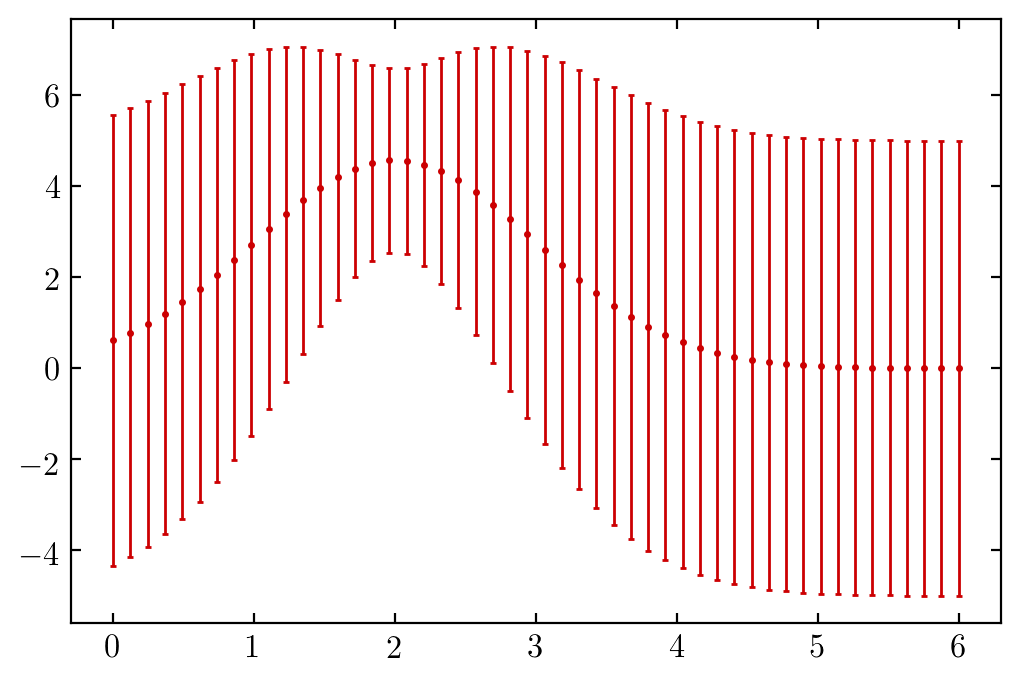

In [60]:
test_x = np.linspace(0, 6).reshape((-1, 1))
pred = m.predict(test_x)#, kern=m.kern.rbf)
gp = pred[0].flatten()
gp_err = np.sqrt(pred[1].flatten())

_, ax = plt.subplots()
ax.errorbar(test_x, gp, yerr=gp_err, linestyle="None", marker=".")

## Ok multiple points

In [95]:
train_x = np.linspace(1, 4, num=10).reshape((-1, 1))
train_y = (train_x**(0.5)).reshape((-1, 1))
y_err = 0.5

#k_fixed = GPy.kern.Fixed(1, np.diag(np.full(len(train_x), 100)))
k_rbf = GPy.kern.RBF(1)

m = GPy.models.GPRegression(train_x, train_y, k_rbf)#+ k_fixed)

In [96]:
m.Gaussian_noise.constrain_fixed(np.sqrt(y_err))
#m.kern.fixed.variance.constrain_fixed(1)

array([0])

In [97]:
m.optimize(messages=True)

<ErrorbarContainer object of 3 artists>

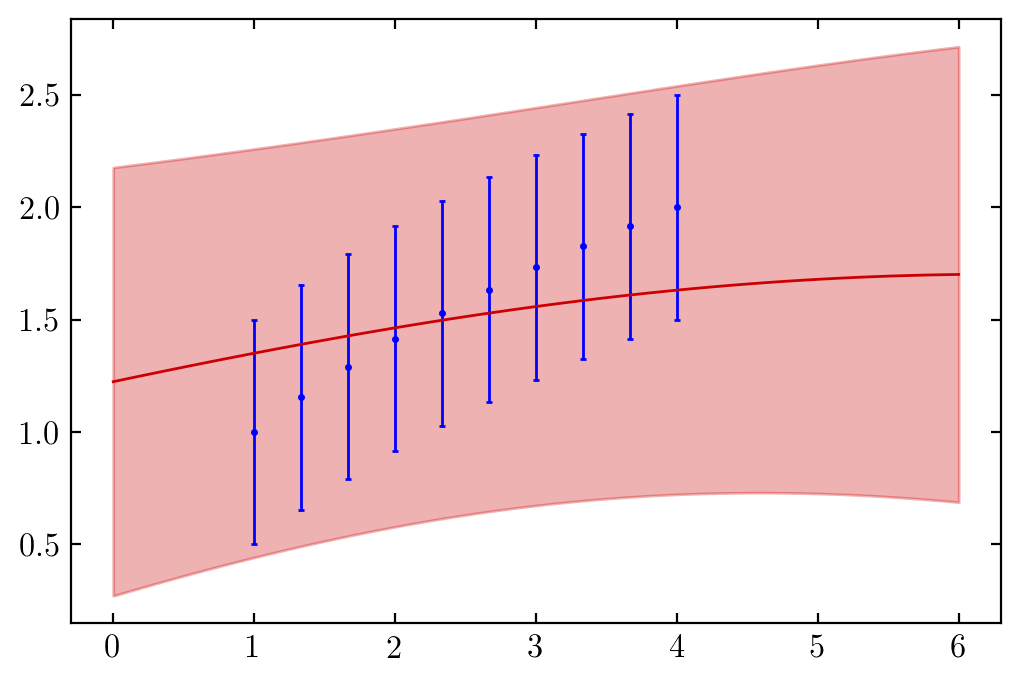

In [98]:
test_x = np.linspace(0, 6).reshape((-1, 1))

pred = m.predict(test_x)#, kern=m.kern.rbf)
gp = pred[0].flatten()
gp_err = pred[1].flatten()

_, ax = plt.subplots()
l = ax.plot(test_x.flatten(), gp)
ax.fill_between(test_x.flatten(), gp + np.sqrt(gp_err), gp - np.sqrt(gp_err), color=l[0].get_color(), alpha=0.3)
ax.errorbar(train_x.flatten(), train_y.flatten(), yerr=y_err, linestyle="None", marker=".")